In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
df_smp = pd.read_csv("data/conductors-sample-subm.csv.zip", low_memory=False)

In [4]:
df_smp.head(3)

,id,formation_energy_ev_natom,bandgap_energy_ev
0,1,0.1779,1.8892
1,2,0.1779,1.8892
2,3,0.1779,1.8892


In [5]:
df_trn_raw = pd.read_csv("data/conductors-train.csv.zip", low_memory=False)

In [6]:
df_trn_raw.head(3).T

,0,1,2
id,1.0000,2.0000,3.0000
spacegroup,33.0000,194.0000,227.0000
number_of_total_atoms,80.0000,80.0000,40.0000
percent_atom_al,0.6250,0.6250,0.8125
percent_atom_ga,0.3750,0.3750,0.1875
percent_atom_in,0.0000,0.0000,0.0000
lattice_vector_1_ang,9.9523,6.1840,9.7510
lattice_vector_2_ang,8.5513,6.1838,5.6595
lattice_vector_3_ang,9.1775,23.6287,13.9630
lattice_angle_alpha_degree,90.0026,90.0186,90.9688


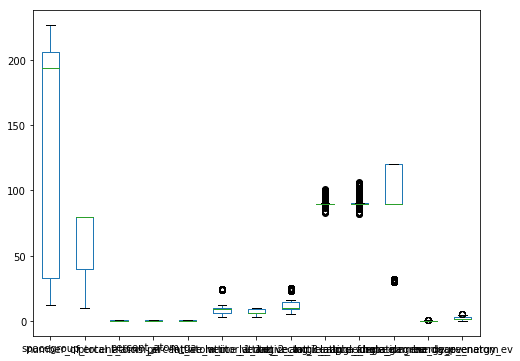

In [7]:
df_trn_raw.drop("id", axis=1).plot(kind="box", figsize=(8, 6))

In [8]:
del df_trn_raw["id"]

In [9]:
y1 = df_trn_raw["formation_energy_ev_natom"]
y2 = df_trn_raw["bandgap_energy_ev"]

del df_trn_raw["formation_energy_ev_natom"]
del df_trn_raw["bandgap_energy_ev"]

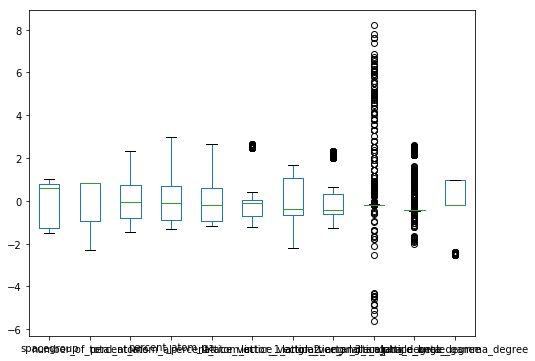

In [10]:
df_trn_norm = (df_trn_raw - np.mean(df_trn_raw)) / np.std(df_trn_raw)
df_trn_norm.plot(kind="box", figsize=(8, 6))

In [11]:
df_trn_norm.head(3).T

,0,1,2
spacegroup,-1.281235,0.619639,1.009259
number_of_total_atoms,0.810885,0.810885,-0.959526
percent_atom_al,0.902265,0.902265,1.608450
percent_atom_ga,0.284159,0.284159,-0.518259
percent_atom_in,-1.162707,-1.162707,-1.162707
lattice_vector_1_ang,-0.013767,-0.681399,-0.049431
lattice_vector_2_ang,0.774800,-0.477888,-0.755305
lattice_vector_3_ang,-0.626795,2.024991,0.251341
lattice_angle_alpha_degree,-0.180793,-0.168794,0.543833
lattice_angle_beta_degree,-0.452319,-0.453130,-0.240849


In [14]:
m1 = RandomForestRegressor(n_jobs=-1)
m1.fit(df_trn_norm, y1)
m1.score(df_trn_norm, y1)

0.9320666542226342

In [15]:
m2 = RandomForestRegressor(n_jobs=-1)
m2.fit(df_trn_norm, y2)
m2.score(df_trn_norm, y2)

0.9818936356378486

In [21]:
df_test_raw = pd.read_csv("data/conductors-test.csv.zip", low_memory=False)

In [22]:
df_test_raw.isnull().sum() / len(df_test_raw)

id                            0.0
spacegroup                    0.0
number_of_total_atoms         0.0
percent_atom_al               0.0
percent_atom_ga               0.0
percent_atom_in               0.0
lattice_vector_1_ang          0.0
lattice_vector_2_ang          0.0
lattice_vector_3_ang          0.0
lattice_angle_alpha_degree    0.0
lattice_angle_beta_degree     0.0
lattice_angle_gamma_degree    0.0
dtype: float64

In [23]:
df_test_norm = (df_test_raw - np.mean(df_test_raw)) / np.std(df_test_raw)

In [24]:
del df_test_norm["id"]

In [25]:
y1_pred = m1.predict(df_test_norm)
y2_pred = m2.predict(df_test_norm)

In [26]:
subm = pd.DataFrame({
    "id": df_test_raw["id"],
    "formation_energy_ev_natom": y1_pred,
    "bandgap_energy_ev": y2_pred
})

In [29]:
subm.to_csv("data/conductors-rf-subm.csv", index=False)

In [30]:
from IPython.display import FileLinks

In [31]:
FileLinks("data/")

data/
  sample_submission.csv
  titanic-sample-subm.csv
  house-rf-subm.csv
  conductors-train.csv.zip
  titanic-test.csv
  titanic-train.csv
  conductors-sample-subm.csv.zip
  titanic-rf-submission.csv
  conductors-test.csv.zip
  train.csv
  house-test.csv
  house-train.csv
  test.csv
  conductors-rf-subm.csv
  house-sample-subm.csv